In [1]:
# USE OF DROP FROM DENSE LAYERS

In [2]:
import pandas as pd
import warnings
from sklearn.model_selection import  train_test_split
import tensorflow as tf
from keras import Sequential, layers
import keras
import seaborn as sn
from matplotlib import pyplot as plt

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("sonar_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.shape

(208, 61)

In [6]:
X = df.drop(60, axis='columns')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [7]:
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [8]:
y.replace({
    'R' : '0',
    'M' : '1'
}, inplace=True)

In [9]:
y.dtypes

dtype('O')

In [10]:
y = pd.to_numeric(y)

In [11]:
y.dtypes

dtype('int64')

In [12]:
y.sample()

74    0
Name: 60, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
len(X_train)

166

In [15]:
len(X_test)

42

In [16]:
len(y_train)

166

In [17]:
len(y_test)

42

## CREATING MODEL WITHOUT ANY HIDDEN LAYER WITHOUT DROPOUT LAYER

In [18]:
model = Sequential([
    layers.Flatten(input_shape=(60,),),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500)



Epoch 1/500


6/6 [==============================] - 1s 4ms/step - loss: 0.7324 - accuracy: 0.4880
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.4699
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.4940
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.4699
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.4699
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5060
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4940
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.4940
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 11/500
6/6 [=======

6/6 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7470
Epoch 160/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7410
Epoch 161/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7711
Epoch 162/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7590
Epoch 163/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7590
Epoch 164/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7530
Epoch 165/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7590
Epoch 166/500
6/6 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.7711
Epoch 167/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7711
Epoch 168/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7590
Epoch 169/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7590
Epoch 324/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7651
Epoch 325/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7590
Epoch 326/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7530
Epoch 327/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7590
Epoch 328/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7711
Epoch 329/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7711
Epoch 330/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7711
Epoch 331/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7952
Epoch 332/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7952
Epoch 333/500
6/6 [=====

6/6 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8072
Epoch 488/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.8193
Epoch 489/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8193
Epoch 490/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8072
Epoch 491/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8133
Epoch 492/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8072
Epoch 493/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8133
Epoch 494/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8193
Epoch 495/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8253
Epoch 496/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8253
Epoch 497/500
6/6 [=====

In [19]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 13ms/step - loss: 0.4623 - accuracy: 0.7619


[0.46226292848587036, 0.761904776096344]

In [20]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [21]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24,  0],
       [18,  0]])>

Text(-4.277777777777779, 0.5, 'Truth')

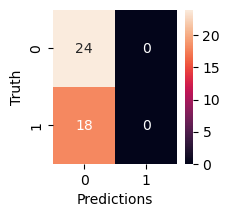

In [22]:
plt.figure(figsize=(2,2))
sn.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Truth')

# CREATING MODEL WITH HIDDEN LAYERS WITHOUT DROPOUT LAYER

In [23]:
model = Sequential([
    layers.Flatten(input_shape=(60,),),
    layers.Dense(100, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, batch_size=8)

Epoch 1/500
21/21 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5602
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6325
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6506
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7651
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7892
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7952
Epoch 7/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7831
Epoch 8/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8193
Epoch 9/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8253
Epoch 10/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8072
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 9.9103e-04 - accuracy: 1.0000
Epoch 84/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 85/500
21/21 [==============================] - 0s 2ms/step - loss: 8.8193e-04 - accuracy: 1.0000
Epoch 86/500
21/21 [==============================] - 0s 2ms/step - loss: 9.0842e-04 - accuracy: 1.0000
Epoch 87/500
21/21 [==============================] - 0s 2ms/step - loss: 8.8669e-04 - accuracy: 1.0000
Epoch 88/500
21/21 [==============================] - 0s 2ms/step - loss: 8.0709e-04 - accuracy: 1.0000
Epoch 89/500
21/21 [==============================] - 0s 3ms/step - loss: 7.7610e-04 - accuracy: 1.0000
Epoch 90/500
21/21 [==============================] - 0s 2ms/step - loss: 7.5306e-04 - accuracy: 1.0000
Epoch 91/500
21/21 [==============================] - 0s 2ms/step - loss: 7.8769e-04 - accuracy: 1.0000
Epoch 92/500
21/21 [==============================] - 0s 3ms/step - loss: 7.1092e

21/21 [==============================] - 0s 2ms/step - loss: 3.3411e-05 - accuracy: 1.0000
Epoch 240/500
21/21 [==============================] - 0s 2ms/step - loss: 3.2618e-05 - accuracy: 1.0000
Epoch 241/500
21/21 [==============================] - 0s 2ms/step - loss: 3.1489e-05 - accuracy: 1.0000
Epoch 242/500
21/21 [==============================] - 0s 2ms/step - loss: 3.1571e-05 - accuracy: 1.0000
Epoch 243/500
21/21 [==============================] - 0s 2ms/step - loss: 3.0562e-05 - accuracy: 1.0000
Epoch 244/500
21/21 [==============================] - 0s 2ms/step - loss: 3.0300e-05 - accuracy: 1.0000
Epoch 245/500
21/21 [==============================] - 0s 2ms/step - loss: 3.0316e-05 - accuracy: 1.0000
Epoch 246/500
21/21 [==============================] - 0s 2ms/step - loss: 3.0036e-05 - accuracy: 1.0000
Epoch 247/500
21/21 [==============================] - 0s 2ms/step - loss: 2.9052e-05 - accuracy: 1.0000
Epoch 248/500
21/21 [==============================] - 0s 2ms/step - 

21/21 [==============================] - 0s 2ms/step - loss: 3.6489e-06 - accuracy: 1.0000
Epoch 396/500
21/21 [==============================] - 0s 2ms/step - loss: 3.5628e-06 - accuracy: 1.0000
Epoch 397/500
21/21 [==============================] - 0s 2ms/step - loss: 3.5672e-06 - accuracy: 1.0000
Epoch 398/500
21/21 [==============================] - 0s 2ms/step - loss: 3.4803e-06 - accuracy: 1.0000
Epoch 399/500
21/21 [==============================] - 0s 2ms/step - loss: 3.3821e-06 - accuracy: 1.0000
Epoch 400/500
21/21 [==============================] - 0s 2ms/step - loss: 3.3500e-06 - accuracy: 1.0000
Epoch 401/500
21/21 [==============================] - 0s 2ms/step - loss: 3.3903e-06 - accuracy: 1.0000
Epoch 402/500
21/21 [==============================] - 0s 2ms/step - loss: 3.2923e-06 - accuracy: 1.0000
Epoch 403/500
21/21 [==============================] - 0s 2ms/step - loss: 3.2207e-06 - accuracy: 1.0000
Epoch 404/500
21/21 [==============================] - 0s 2ms/step - 

In [24]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6451 - accuracy: 0.8333


[0.6450566649436951, 0.8333333134651184]

In [25]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [26]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24,  0],
       [10,  8]])>

Text(-4.277777777777779, 0.5, 'Truth')

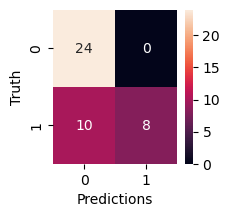

In [27]:
plt.figure(figsize=(2,2))
sn.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Truth')

# CREATING MODEL WITH HIDDEN LAYERS WITH DROPOUT LAYER

In [28]:
model = Sequential([
    layers.Flatten(input_shape=(60,),),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(30, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, batch_size=8)

Epoch 1/500
21/21 [==============================] - 1s 3ms/step - loss: 0.7040 - accuracy: 0.4880
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5602
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5843
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6084
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5361
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6024
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.5602
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6205
Epoch 9/500
21/21 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.6145
Epoch 10/500
21/21 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.6747
Epoch 11/

21/21 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9217
Epoch 84/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9277
Epoch 85/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1660 - accuracy: 0.9157
Epoch 86/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1392 - accuracy: 0.9337
Epoch 87/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9458
Epoch 88/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9277
Epoch 89/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9458
Epoch 90/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9398
Epoch 91/500
21/21 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9036
Epoch 92/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9398
Epoch 93/500


21/21 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9880
Epoch 246/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9759
Epoch 247/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9639
Epoch 248/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9518
Epoch 249/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9699
Epoch 250/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9759
Epoch 251/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9398
Epoch 252/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9398
Epoch 253/500
21/21 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9096
Epoch 254/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9639
Epoc

21/21 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9759
Epoch 408/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9759
Epoch 409/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9699
Epoch 410/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 411/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9819
Epoch 412/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 413/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9699
Epoch 414/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9819
Epoch 415/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9639
Epoch 416/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9940
Epoc

In [29]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.8971 - accuracy: 0.8333


[0.8971280455589294, 0.8333333134651184]

In [30]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [31]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24,  0],
       [13,  5]])>

Text(-4.277777777777779, 0.5, 'Truth')

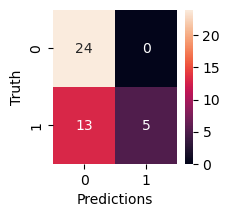

In [32]:
plt.figure(figsize=(2,2))
sn.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Truth')